In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading datasets
train_df=pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx')
train_df.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info  Price  
0                      No info   3897  
1                      No info   7662  
2                      No info  13882  
3                      No info   6218  
4                      No info  13302  
5                      No info   3873  
6  In-flight meal not included  11087  
7                      No info  22270  
8  In-flight meal not included  11087  
9                      No info   8625

In [3]:
train_df.tail(10)

Airline Date_of_Journey    Source Destination  \
10673        Jet Airways      27/05/2019     Delhi      Cochin   
10674        Jet Airways      12/03/2019  Banglore   New Delhi   
10675          Air India       9/06/2019    Mumbai   Hyderabad   
10676  Multiple carriers       1/05/2019     Delhi      Cochin   
10677           SpiceJet      21/05/2019  Banglore       Delhi   
10678           Air Asia       9/04/2019   Kolkata    Banglore   
10679          Air India      27/04/2019   Kolkata    Banglore   
10680        Jet Airways      27/04/2019  Banglore       Delhi   
10681            Vistara      01/03/2019  Banglore   New Delhi   
10682          Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
10673  DEL → AMD → BOM → COK    13:25  04:25 28 May      15h     2 stops   
10674        BLR → BOM → DEL    20:35  21:20 13 Mar  24h 45m      1 stop   
10675              BOM → HYD    06:20         07:40   1h 20m    non-stop   
10676        DEL → BOM → COK    10:20         19:00   8h 40m      1 stop   
10677              BLR → DEL    05:55         08:35   2h 40m    non-stop   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

                    Additional_Info  Price  
10673                       No info  16704  
10674   In-flight meal not included  11087  
10675                       No info   3100  
10676                       No info   9794  
10677  No check-in baggage included   3257  
10678                       No info   4107  
10679                       No info   4145  
10680                       No info   7229  
10681                       No info  12648  
10682                       No info  11753

In [4]:
test_df=pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx')
test_df.head(10)

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   
5        Jet Airways      12/06/2019     Delhi      Cochin  DEL → BOM → COK   
6          Air India      12/03/2019  Banglore   New Delhi  BLR → TRV → DEL   
7             IndiGo       1/05/2019   Kolkata    Banglore  CCU → HYD → BLR   
8             IndiGo      15/03/2019   Kolkata    Banglore        CCU → BLR   
9        Jet Airways      18/05/2019   Kolkata    Banglore  CCU → BOM → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  
5    18:15  12:35 13 Jun  18h 20m      1 stop  In-flight meal not included  
6    07:30         22:35   15h 5m      1 stop                      No info  
7    15:15         20:30   5h 15m      1 stop                      No info  
8    10:10         12:55   2h 45m    non-stop                      No info  
9    16:30         22:35    6h 5m      1 stop                      No info

In [5]:
test_df.tail(10)

Airline Date_of_Journey   Source Destination  \
2661        Jet Airways      27/03/2019    Delhi      Cochin   
2662          Air India      21/05/2019   Mumbai   Hyderabad   
2663              GoAir      12/05/2019  Kolkata    Banglore   
2664  Multiple carriers      15/06/2019    Delhi      Cochin   
2665           SpiceJet      21/06/2019   Mumbai   Hyderabad   
2666          Air India       6/06/2019  Kolkata    Banglore   
2667             IndiGo      27/03/2019  Kolkata    Banglore   
2668        Jet Airways       6/03/2019    Delhi      Cochin   
2669          Air India       6/03/2019    Delhi      Cochin   
2670  Multiple carriers      15/06/2019    Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
2661  DEL → AMD → BOM → COK    19:10  04:25 29 Mar  33h 15m     2 stops   
2662              BOM → HYD    13:55         15:25   1h 30m    non-stop   
2663        CCU → BOM → BLR    23:30  07:45 13 May   8h 15m      1 stop   
2664        DEL → BOM → COK    15:15  01:30 16 Jun  10h 15m      1 stop   
2665              BOM → HYD    22:45  00:15 22 Jun   1h 30m    non-stop   
2666        CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667              CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668        DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669        DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670        DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                   Additional_Info  
2661                       No info  
2662                       No info  
2663                       No info  
2664                       No info  
2665  No check-in baggage included  
2666                       No info  
2667                       No info  
2668                       No info  
2669                       No info  
2670                       No info

In [6]:
final_df=train_df.append(test_df)
final_df.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info    Price  
0                      No info   3897.0  
1                      No info   7662.0  
2                      No info  13882.0  
3                      No info   6218.0  
4                      No info  13302.0  
5                      No info   3873.0  
6  In-flight meal not included  11087.0  
7                      No info  22270.0  
8  In-flight meal not included  11087.0  
9                      No info   8625.0

In [7]:
final_df.tail(10)

Airline Date_of_Journey   Source Destination  \
2661        Jet Airways      27/03/2019    Delhi      Cochin   
2662          Air India      21/05/2019   Mumbai   Hyderabad   
2663              GoAir      12/05/2019  Kolkata    Banglore   
2664  Multiple carriers      15/06/2019    Delhi      Cochin   
2665           SpiceJet      21/06/2019   Mumbai   Hyderabad   
2666          Air India       6/06/2019  Kolkata    Banglore   
2667             IndiGo      27/03/2019  Kolkata    Banglore   
2668        Jet Airways       6/03/2019    Delhi      Cochin   
2669          Air India       6/03/2019    Delhi      Cochin   
2670  Multiple carriers      15/06/2019    Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
2661  DEL → AMD → BOM → COK    19:10  04:25 29 Mar  33h 15m     2 stops   
2662              BOM → HYD    13:55         15:25   1h 30m    non-stop   
2663        CCU → BOM → BLR    23:30  07:45 13 May   8h 15m      1 stop   
2664        DEL → BOM → COK    15:15  01:30 16 Jun  10h 15m      1 stop   
2665              BOM → HYD    22:45  00:15 22 Jun   1h 30m    non-stop   
2666        CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667              CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668        DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669        DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670        DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                   Additional_Info  Price  
2661                       No info    NaN  
2662                       No info    NaN  
2663                       No info    NaN  
2664                       No info    NaN  
2665  No check-in baggage included    NaN  
2666                       No info    NaN  
2667                       No info    NaN  
2668                       No info    NaN  
2669                       No info    NaN  
2670                       No info    NaN

## Basic EDA

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [9]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
final_df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [11]:
final_df.value_counts()

Airline                  Date_of_Journey  Source    Destination  Route                  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info              Price  
Jet Airways              27/05/2019       Delhi     Cochin       DEL → AMD → BOM → COK  19:10     19:00 28 May  23h 50m   2 stops      No info                      15129.0    3
                         18/05/2019       Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 19 May  22h 55m   2 stops      In-flight meal not included  13029.0    3
Air India                24/06/2019       Delhi     Cochin       DEL → GOI → BOM → COK  22:00     19:15 25 Jun  21h 15m   2 stops      No info                      9181.0     3
Jet Airways              9/05/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 10 May  22h 55m   2 stops      In-flight meal not included  13029.0    3
                         1/06/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 02 Jun  22h 55m 

In [12]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [13]:
#feature Engineering
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Day']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info    Price  Date Month Day  
0                      No info   3897.0  2019    03  24  
1                      No info   7662.0  2019    05   1  
2                      No info  13882.0  2019    06   9  
3                      No info   6218.0  2019    05  12  
4                      No info  13302.0  2019    03  01  
5                      No info   3873.0  2019    06  24  
6  In-flight meal not included  11087.0  2019    03  12  
7                      No info  22270.0  2019    03  01  
8  In-flight meal not included  11087.0  2019    03  12  
9                      No info   8625.0  2019    05  27

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Day              13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [15]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Day']=final_df['Day'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Day              13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [16]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head(10)

Airline    Source Destination                  Route Dep_Time  \
0             IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1          Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2        Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3             IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4             IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
5           SpiceJet   Kolkata    Banglore              CCU → BLR    09:00   
6        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    18:55   
7        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:00   
8        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:55   
9  Multiple carriers     Delhi      Cochin        DEL → BOM → COK    11:25   

   Arrival_Time Duration Total_Stops              Additional_Info    Price  \
0  01:10 22 Mar   2h 50m    non-stop                      No info   3897.0   
1         13:15   7h 25m     2 stops                      No info   7662.0   
2  04:25 10 Jun      19h     2 stops                      No info  13882.0   
3         23:30   5h 25m      1 stop                      No info   6218.0   
4         21:35   4h 45m      1 stop                      No info  13302.0   
5         11:25   2h 25m    non-stop                      No info   3873.0   
6  10:25 13 Mar  15h 30m      1 stop  In-flight meal not included  11087.0   
7  05:05 02 Mar   21h 5m      1 stop                      No info  22270.0   
8  10:25 13 Mar  25h 30m      1 stop  In-flight meal not included  11087.0   
9         19:15   7h 50m      1 stop                      No info   8625.0   

   Date  Month  Day  
0  2019      3   24  
1  2019      5    1  
2  2019      6    9  
3  2019      5   12  
4  2019      3    1  
5  2019      6   24  
6  2019      3   12  
7  2019      3    1  
8  2019      3   12  
9  2019      5   27

In [17]:
final_df['Arrival_Time'].str.split(' ').str[0]


0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [18]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_minute']=final_df['Arrival_Time'].str.split(':').str[1]
final_df.head(5)

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info    Price  Date  Month  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  2019      3   
1         13:15   7h 25m     2 stops         No info   7662.0  2019      5   
2  04:25 10 Jun      19h     2 stops         No info  13882.0  2019      6   
3         23:30   5h 25m      1 stop         No info   6218.0  2019      5   
4         21:35   4h 45m      1 stop         No info  13302.0  2019      3   

   Day Arrival_hour Arrival_minute  
0   24           01      10 22 Mar  
1    1           13             15  
2    9           04      25 10 Jun  
3   12           23             30  
4    1           21             35

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Day              13354 non-null  int64  
 13  Arrival_hour     13354 non-null  object 
 14  Arrival_minute   13354 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 1.6+ MB


In [20]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Day              13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_minute   13354 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1.6+ MB


In [21]:
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.drop('Additional_Info',axis=1,inplace=True)
final_df

Airline    Source Destination                  Route Dep_Time  \
0                IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1             Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2           Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3                IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4                IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
...                 ...       ...         ...                    ...      ...   
2666          Air India   Kolkata    Banglore        CCU → DEL → BLR    20:30   
2667             IndiGo   Kolkata    Banglore              CCU → BLR    14:20   
2668        Jet Airways     Delhi      Cochin        DEL → BOM → COK    21:50   
2669          Air India     Delhi      Cochin        DEL → BOM → COK    04:00   
2670  Multiple carriers     Delhi      Cochin        DEL → BOM → COK    04:55   

     Duration Total_Stops    Price  Date  Month  Day  Arrival_hour  \
0      2h 50m    non-stop   3897.0  2019      3   24             1   
1      7h 25m     2 stops   7662.0  2019      5    1            13   
2         19h     2 stops  13882.0  2019      6    9             4   
3      5h 25m      1 stop   6218.0  2019      5   12            23   
4      4h 45m      1 stop  13302.0  2019      3    1            21   
...       ...         ...      ...   ...    ...  ...           ...   
2666  23h 55m      1 stop      NaN  2019      6    6            20   
2667   2h 35m    non-stop      NaN  2019      3   27            16   
2668   6h 35m      1 stop      NaN  2019      3    6             4   
2669  15h 15m      1 stop      NaN  2019      3    6            19   
2670  14h 20m      1 stop      NaN  2019      6   15            19   

     Arrival_minute  
0         10 22 Mar  
1                15  
2         25 10 Jun  
3                30  
4                35  
...             ...  
2666      25 07 Jun  
2667             55  
2668      25 07 Mar  
2669             15  
2670             15  

[13354 rows x 13 columns]

In [22]:
final_df['Departure_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Departure_minute']=final_df['Dep_Time'].str.split(':').str[1]

In [23]:
final_df['Departure_hour']=final_df['Departure_hour'].astype(int)
final_df['Departure_minute']=final_df['Departure_minute'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Dep_Time          13354 non-null  object 
 5   Duration          13354 non-null  object 
 6   Total_Stops       13353 non-null  object 
 7   Price             10683 non-null  float64
 8   Date              13354 non-null  int64  
 9   Month             13354 non-null  int64  
 10  Day               13354 non-null  int64  
 11  Arrival_hour      13354 non-null  int64  
 12  Arrival_minute    13354 non-null  object 
 13  Departure_hour    13354 non-null  int64  
 14  Departure_minute  13354 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 1.6+ MB


In [24]:
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df

Airline    Source Destination                  Route Duration  \
0                IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1             Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2           Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3                IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4                IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   
...                 ...       ...         ...                    ...      ...   
2666          Air India   Kolkata    Banglore        CCU → DEL → BLR  23h 55m   
2667             IndiGo   Kolkata    Banglore              CCU → BLR   2h 35m   
2668        Jet Airways     Delhi      Cochin        DEL → BOM → COK   6h 35m   
2669          Air India     Delhi      Cochin        DEL → BOM → COK  15h 15m   
2670  Multiple carriers     Delhi      Cochin        DEL → BOM → COK  14h 20m   

     Total_Stops    Price  Date  Month  Day  Arrival_hour Arrival_minute  \
0       non-stop   3897.0  2019      3   24             1      10 22 Mar   
1        2 stops   7662.0  2019      5    1            13             15   
2        2 stops  13882.0  2019      6    9             4      25 10 Jun   
3         1 stop   6218.0  2019      5   12            23             30   
4         1 stop  13302.0  2019      3    1            21             35   
...          ...      ...   ...    ...  ...           ...            ...   
2666      1 stop      NaN  2019      6    6            20      25 07 Jun   
2667    non-stop      NaN  2019      3   27            16             55   
2668      1 stop      NaN  2019      3    6             4      25 07 Mar   
2669      1 stop      NaN  2019      3    6            19             15   
2670      1 stop      NaN  2019      6   15            19             15   

      Departure_hour  Departure_minute  
0                 22                20  
1                  5                50  
2                  9                25  
3                 18                 5  
4                 16                50  
...              ...               ...  
2666              20                30  
2667              14                20  
2668              21                50  
2669               4                 0  
2670               4                55  

[13354 rows x 14 columns]

In [25]:
final_df.drop('Route',axis=1,inplace=True)
final_df.head(1)

Airline    Source Destination Duration Total_Stops   Price  Date  Month  \
0  IndiGo  Banglore   New Delhi   2h 50m    non-stop  3897.0  2019      3   

   Day  Arrival_hour Arrival_minute  Departure_hour  Departure_minute  
0   24             1      10 22 Mar              22                20

In [26]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':4, 'nan':5, '4 stops':6})
final_df
                                        

Airline    Source Destination Duration  Total_Stops    Price  \
0                IndiGo  Banglore   New Delhi   2h 50m          0.0   3897.0   
1             Air India   Kolkata    Banglore   7h 25m          1.0   7662.0   
2           Jet Airways     Delhi      Cochin      19h          1.0  13882.0   
3                IndiGo   Kolkata    Banglore   5h 25m          2.0   6218.0   
4                IndiGo  Banglore   New Delhi   4h 45m          2.0  13302.0   
...                 ...       ...         ...      ...          ...      ...   
2666          Air India   Kolkata    Banglore  23h 55m          2.0      NaN   
2667             IndiGo   Kolkata    Banglore   2h 35m          0.0      NaN   
2668        Jet Airways     Delhi      Cochin   6h 35m          2.0      NaN   
2669          Air India     Delhi      Cochin  15h 15m          2.0      NaN   
2670  Multiple carriers     Delhi      Cochin  14h 20m          2.0      NaN   

      Date  Month  Day  Arrival_hour Arrival_minute  Departure_hour  \
0     2019      3   24             1      10 22 Mar              22   
1     2019      5    1            13             15               5   
2     2019      6    9             4      25 10 Jun               9   
3     2019      5   12            23             30              18   
4     2019      3    1            21             35              16   
...    ...    ...  ...           ...            ...             ...   
2666  2019      6    6            20      25 07 Jun              20   
2667  2019      3   27            16             55              14   
2668  2019      3    6             4      25 07 Mar              21   
2669  2019      3    6            19             15               4   
2670  2019      6   15            19             15               4   

      Departure_minute  
0                   20  
1                   50  
2                   25  
3                    5  
4                   50  
...                ...  
2666                30  
2667                20  
2668                50  
2669                 0  
2670                55  

[13354 rows x 13 columns]

In [28]:
final_df['Price'].isnull().sum()

2671

In [29]:
final_df['Price']=final_df['Price'].fillna(final_df['Price']).mode()[0]
final_df.head()

Airline    Source Destination Duration  Total_Stops    Price  Date  \
0       IndiGo  Banglore   New Delhi   2h 50m          0.0  10262.0  2019   
1    Air India   Kolkata    Banglore   7h 25m          1.0  10262.0  2019   
2  Jet Airways     Delhi      Cochin      19h          1.0  10262.0  2019   
3       IndiGo   Kolkata    Banglore   5h 25m          2.0  10262.0  2019   
4       IndiGo  Banglore   New Delhi   4h 45m          2.0  10262.0  2019   

   Month  Day  Arrival_hour Arrival_minute  Departure_hour  Departure_minute  
0      3   24             1      10 22 Mar              22                20  
1      5    1            13             15               5                50  
2      6    9             4      25 10 Jun               9                25  
3      5   12            23             30              18                 5  
4      3    1            21             35              16                50

In [30]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [32]:
final_df.head(5)

Airline    Source Destination Duration  Total_Stops    Price  Date  \
0       IndiGo  Banglore   New Delhi   2h 50m          0.0  10262.0  2019   
1    Air India   Kolkata    Banglore   7h 25m          1.0  10262.0  2019   
2  Jet Airways     Delhi      Cochin      19h          1.0  10262.0  2019   
3       IndiGo   Kolkata    Banglore   5h 25m          2.0  10262.0  2019   
4       IndiGo  Banglore   New Delhi   4h 45m          2.0  10262.0  2019   

   Month  Day  Arrival_hour Arrival_minute  Departure_hour  Departure_minute  
0      3   24             1      10 22 Mar              22                20  
1      5    1            13             15               5                50  
2      6    9             4      25 10 Jun               9                25  
3      5   12            23             30              18                 5  
4      3    1            21             35              16                50

In [33]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df.head(5)

Airline  Source  Destination Duration  Total_Stops    Price  Date  Month  \
0        3       0            5   2h 50m          0.0  10262.0  2019      3   
1        1       3            0   7h 25m          1.0  10262.0  2019      5   
2        4       2            1      19h          1.0  10262.0  2019      6   
3        3       3            0   5h 25m          2.0  10262.0  2019      5   
4        3       0            5   4h 45m          2.0  10262.0  2019      3   

   Day  Arrival_hour Arrival_minute  Departure_hour  Departure_minute  
0   24             1      10 22 Mar              22                20  
1    1            13             15               5                50  
2    9             4      25 10 Jun               9                25  
3   12            23             30              18                 5  
4    1            21             35              16                50

In [34]:
final_df.shape

(13354, 13)

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  int64  
 1   Source            13354 non-null  int64  
 2   Destination       13354 non-null  int64  
 3   Duration          13354 non-null  object 
 4   Total_Stops       13353 non-null  float64
 5   Price             13354 non-null  float64
 6   Date              13354 non-null  int64  
 7   Month             13354 non-null  int64  
 8   Day               13354 non-null  int64  
 9   Arrival_hour      13354 non-null  int64  
 10  Arrival_minute    13354 non-null  object 
 11  Departure_hour    13354 non-null  int64  
 12  Departure_minute  13354 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.4+ MB


## Data Visualization

<AxesSubplot:xlabel='Airline', ylabel='count'>

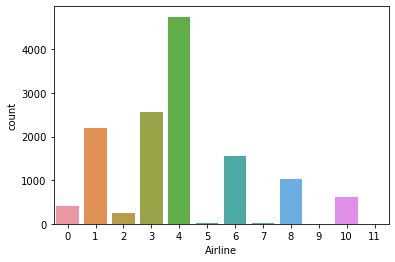

In [36]:
sns.countplot(x='Airline',data=final_df)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

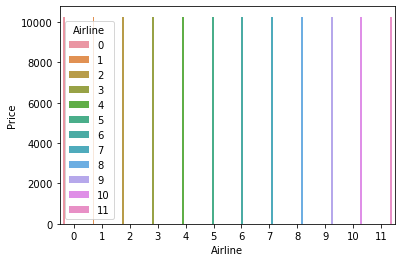

In [37]:
sns.barplot(x='Airline',y='Price',data=final_df,hue='Airline')

([<matplotlib.patches.Wedge at 0x7ff01eef1910>,
 [Text(0.8899186877588753, 0.6465637858537406, 'A'),
  Text(-0.3399187231970732, 1.046162158377023, 'i'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'r'),
  Text(-0.33991862524830174, -1.0461621902025062, 'l'),
  Text(0.8899187482945414, -0.6465637025335375, 'i')],
 [Text(0.4854101933230228, 0.35267115592022213, '20%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20%'),
  Text(0.4854102263424771, -0.3526711104728386, '20%')])

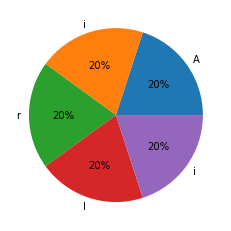

In [38]:
plt.pie(final_df.Price[:5],autopct='%.0f%%',shadow=False,labels='Airline'[:5])

In [39]:
#performing automated EDA
import pandas_profiling
import seaborn as sns

In [40]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [41]:
from pandas_profiling import ProfileReport

In [42]:
report=ProfileReport(df,explorative=True,dark_mode=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
health_df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
health_df.head(1)

id gender   age  hypertension  heart_disease ever_married work_type  \
0  9046   Male  67.0             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1

In [44]:
health_report=ProfileReport(health_df,explorative=True,dark_mode=True)
health_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]